# Modules

In [64]:
import spectral_analysis as sa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# Find phases

In [65]:
# find shear

not_sheared = pd.read_csv("data/no_shear.csv", skiprows = 2)
sheared = pd.read_csv("data/shear.csv", skiprows = 2)

shear = sa.find_shift(not_sheared, sheared)
print("Shear of {} THz.".format(shear))

new_not_sheared = pd.read_csv("data/new_no_shear.csv", skiprows = 2)
new_sheared = pd.read_csv("data/new_shear.csv", skiprows = 2)

new_shear = sa.find_shift(new_not_sheared, new_sheared)
print("Shear of {} THz.".format(new_shear))

# extract phases

start = 191.9
end = 192.4

no_fiber = sa.spider(phase_spectrum = "data/no_fiber_shear.csv",
        temporal_spectrum = "data/no_fiber_no_shear.csv",
        shear = shear,
        intensity_spectrum = None,
        phase_borders = [start, end],
        spectrum_in = "wl",
        what_to_return = "phase",
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

fiber20 = sa.spider(phase_spectrum = "data/fiber20_shear.csv",
        temporal_spectrum = "data/fiber20_no_shear.csv",
        shear = shear,
        intensity_spectrum = None,
        phase_borders = [start, end],
        spectrum_in = "wl",
        what_to_return = "phase",
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

fiber50 = sa.spider(phase_spectrum = "data/fiber50_shear.csv",
        temporal_spectrum = "data/fiber50_no_shear.csv",
        shear = shear,
        intensity_spectrum = None,
        phase_borders = [start, end],
        spectrum_in = "wl",
        what_to_return = "phase",
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

fiber100 = sa.spider(phase_spectrum = "data/fiber100_shear.csv",
        temporal_spectrum = "data/fiber100_no_shear.csv",
        shear = shear,
        intensity_spectrum = None,
        phase_borders = [start, end],
        spectrum_in = "wl",
        what_to_return = "phase",
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

fiber150 = sa.spider(phase_spectrum = "data/fiber150_shear.csv",
        temporal_spectrum = "data/fiber150_no_shear.csv",
        shear = shear,
        intensity_spectrum = None,
        phase_borders = [start, end],
        spectrum_in = "wl",
        what_to_return = "phase",
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

fiber250 = sa.spider(phase_spectrum = "data/fiber250_shear.csv",
        temporal_spectrum = "data/fiber250_no_shear.csv",
        shear = new_shear,
        intensity_spectrum = None,
        phase_borders = [start, end],
        spectrum_in = "wl",
        what_to_return = "phase",
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

Shear of 0.025124347034496678 THz.
Shear of 0.04235003603559062 THz.


# Simulate phases

In [66]:
def phase(f, f_mean, fiber_length):
    l_0 = 1560
    c = 3*1e8
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

# Fiber 0m

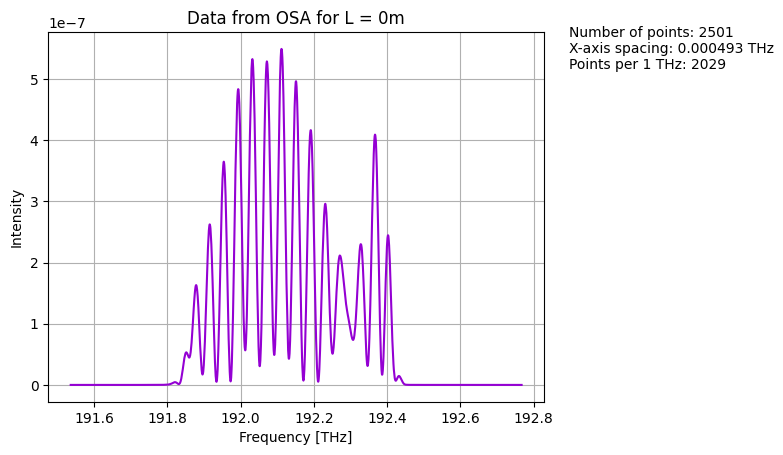

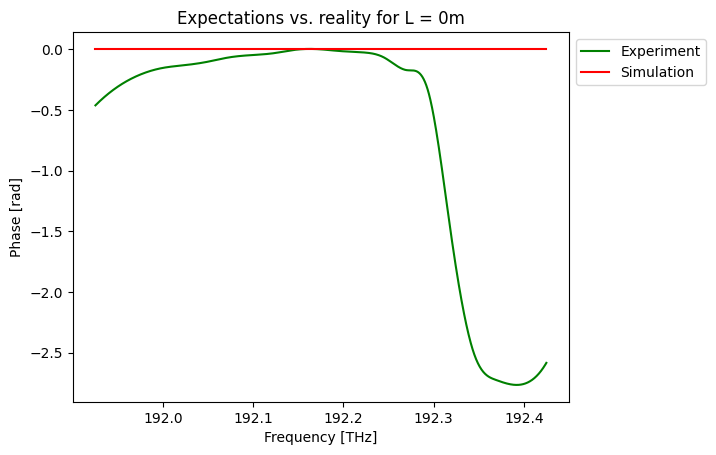

In [67]:
# L = 0

fringes_no_fiber = pd.read_csv("data/no_fiber_shear.csv", skiprows = 2)
sa.plot(sa.wl_to_freq(fringes_no_fiber), title = "Data from OSA for L = 0m", x_type = "freq")

X = no_fiber.values[:, 0]
Y = no_fiber.values[:, 1]
Y_pred = phase(X, np.mean(X), 0)

plt.plot(X, Y, color = "green")
plt.plot(X, Y_pred, color = "red")
plt.title("Expectations vs. reality for L = 0m")
plt.xlabel("Frequency [THz]")
plt.ylabel("Phase [rad]")
plt.legend(["Experiment", "Simulation"], bbox_to_anchor = [1, 1])
plt.show()

# Fiber 20m

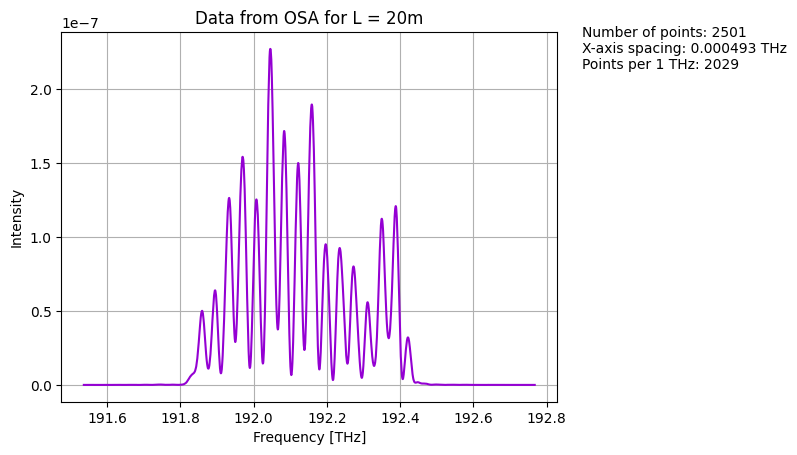

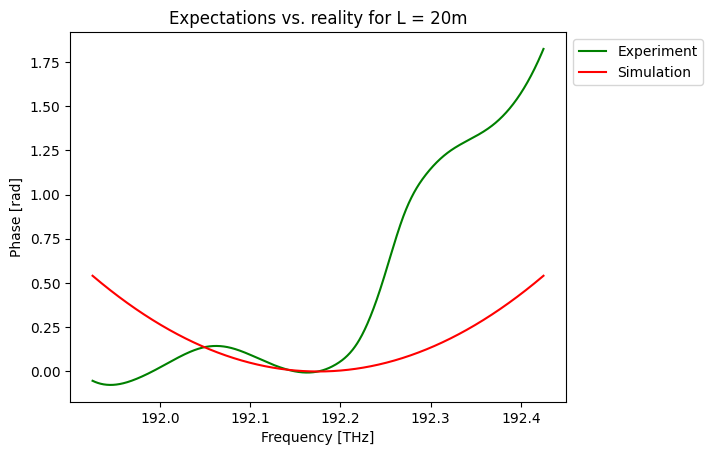

In [68]:
# L = 20

fringes_fiber20 = pd.read_csv("data/fiber20_shear.csv", skiprows = 2)
sa.plot(sa.wl_to_freq(fringes_fiber20), title = "Data from OSA for L = 20m", x_type = "freq")

X = fiber20.values[:, 0]
Y = fiber20.values[:, 1]
Y_pred = phase(X, np.mean(X), 20)

plt.plot(X, Y, color = "green")
plt.plot(X, Y_pred, color = "red")
plt.title("Expectations vs. reality for L = 20m")
plt.xlabel("Frequency [THz]")
plt.ylabel("Phase [rad]")
plt.legend(["Experiment", "Simulation"], bbox_to_anchor = [1, 1])
plt.show()

# Fiber 50m

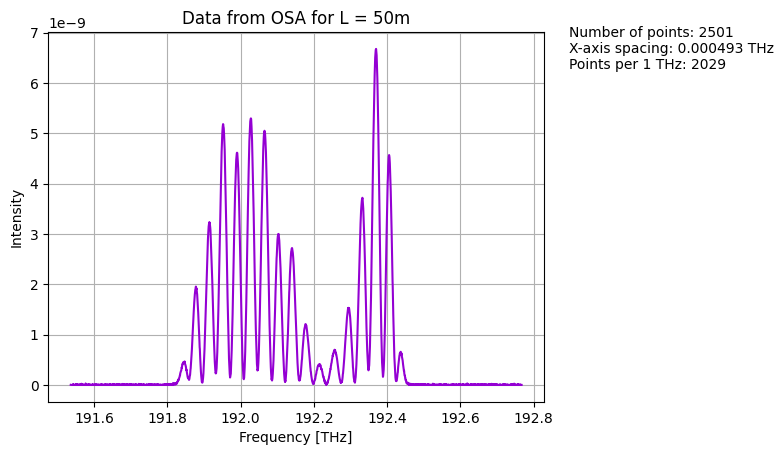

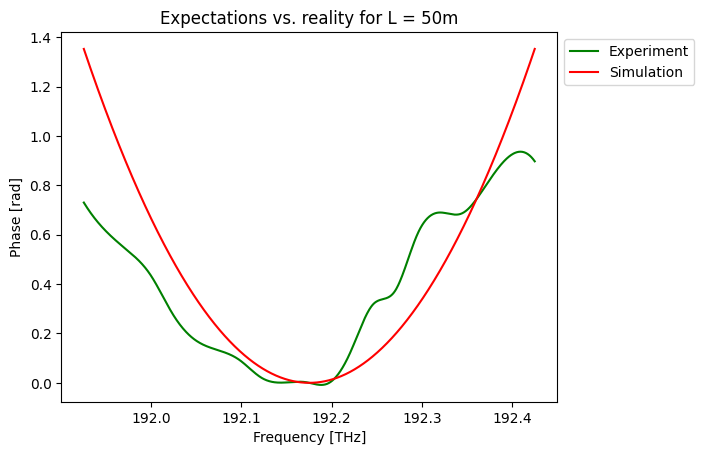

In [69]:
# L = 50

fringes_fiber50 = pd.read_csv("data/fiber50_shear.csv", skiprows = 2)
sa.plot(sa.wl_to_freq(fringes_fiber50), title = "Data from OSA for L = 50m", x_type = "freq")

X = fiber50.values[:, 0]
Y = fiber50.values[:, 1]
Y_pred = phase(X, np.mean(X), 50)

plt.plot(X, Y, color = "green")
plt.plot(X, Y_pred, color = "red")
plt.title("Expectations vs. reality for L = 50m")
plt.xlabel("Frequency [THz]")
plt.ylabel("Phase [rad]")
plt.legend(["Experiment", "Simulation"], bbox_to_anchor = [1, 1])
plt.show()

# Fiber 100m

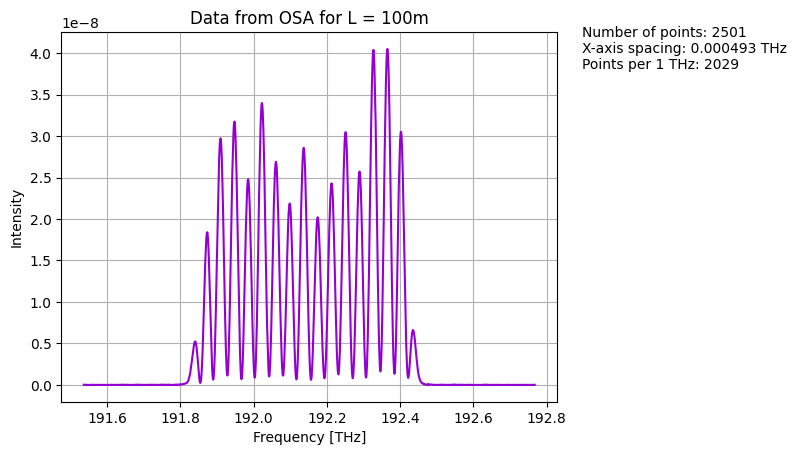

C:\Users\rewas\AppData\Local\Temp\ipykernel_25168\858438920.py:7: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


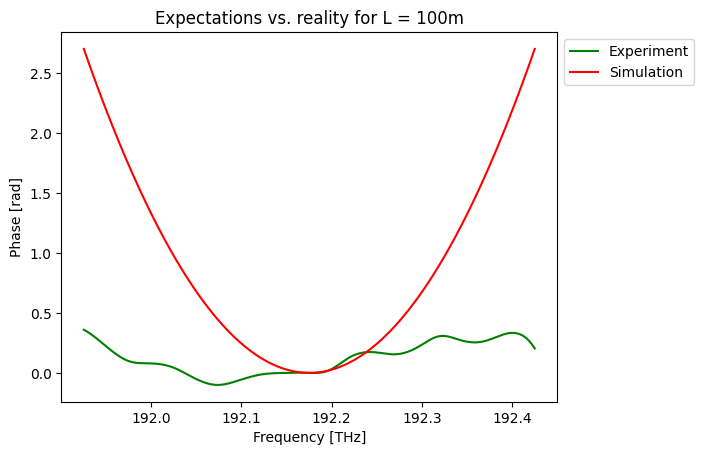

In [70]:
# L = 100

fringes_fiber100 = pd.read_csv("data/fiber100_shear.csv", skiprows = 2)
sa.plot(sa.wl_to_freq(fringes_fiber100), title = "Data from OSA for L = 100m", x_type = "freq")

X = fiber100.values[:, 0]
Y = fiber100.values[:, 1]
Y_pred = phase(X, np.mean(X), 100)

plt.plot(X, Y, color = "green")
plt.plot(X, Y_pred, color = "red")
plt.title("Expectations vs. reality for L = 100m")
plt.xlabel("Frequency [THz]")
plt.ylabel("Phase [rad]")
plt.legend(["Experiment", "Simulation"], bbox_to_anchor = [1, 1])
plt.show()

# Fiber 150m

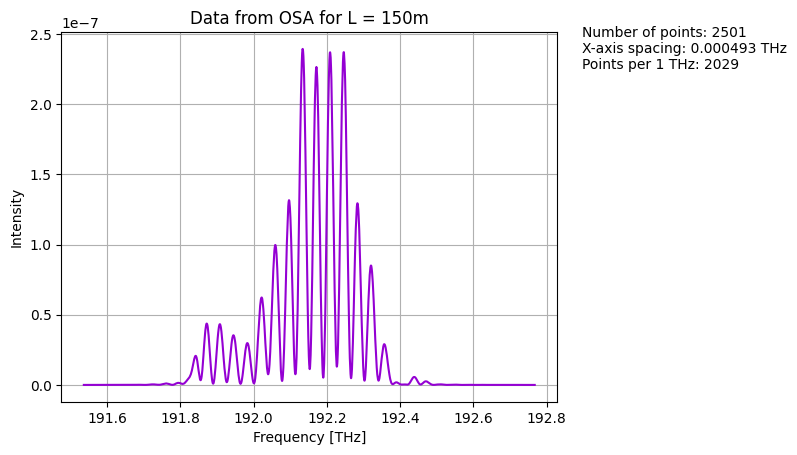

C:\Users\rewas\AppData\Local\Temp\ipykernel_25168\858438920.py:7: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


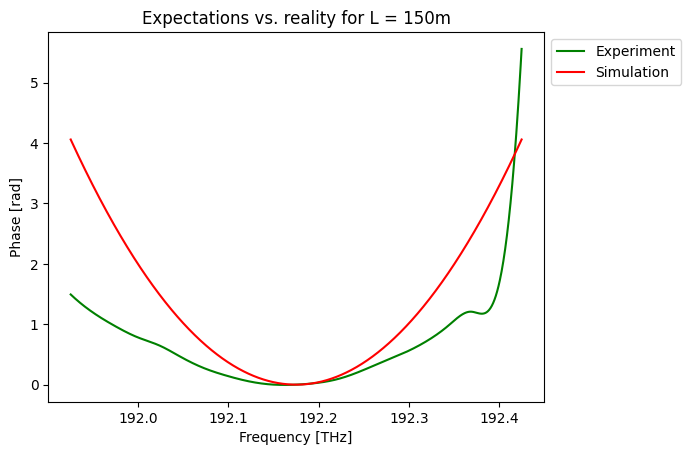

In [71]:
# L = 150

fringes_fiber150 = pd.read_csv("data/fiber150_shear.csv", skiprows = 2)
sa.plot(sa.wl_to_freq(fringes_fiber150), title = "Data from OSA for L = 150m", x_type = "freq")

X = fiber150.values[:, 0]
Y = fiber150.values[:, 1]
Y_pred = phase(X, np.mean(X), 150)

plt.plot(X, Y, color = "green")
plt.plot(X, Y_pred, color = "red")
plt.title("Expectations vs. reality for L = 150m")
plt.xlabel("Frequency [THz]")
plt.ylabel("Phase [rad]")
plt.legend(["Experiment", "Simulation"], bbox_to_anchor = [1, 1])
plt.show()

# Fiber 250m

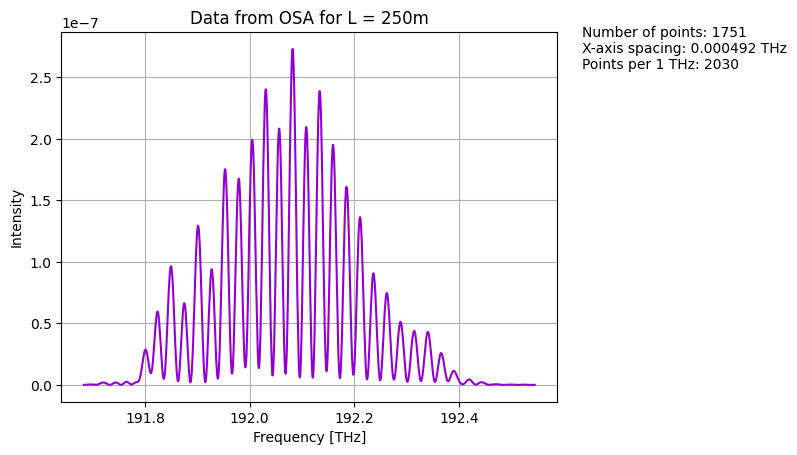

C:\Users\rewas\AppData\Local\Temp\ipykernel_25168\858438920.py:7: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


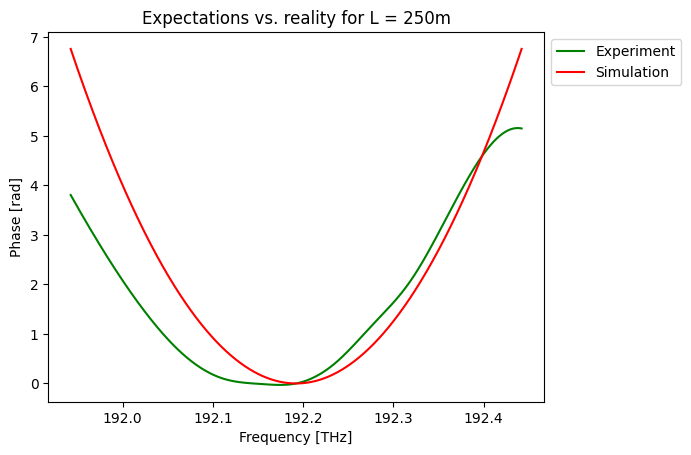

In [72]:
# L = 250

fringes_fiber250 = pd.read_csv("data/fiber250_shear.csv", skiprows = 2)
sa.plot(sa.wl_to_freq(fringes_fiber250), title = "Data from OSA for L = 250m", x_type = "freq")

X = fiber250.values[:, 0]
Y = fiber250.values[:, 1]
Y_pred = phase(X, np.mean(X), 250)

plt.plot(X, Y, color = "green")
plt.plot(X, Y_pred, color = "red")
plt.title("Expectations vs. reality for L = 250m")
plt.xlabel("Frequency [THz]")
plt.ylabel("Phase [rad]")
plt.legend(["Experiment", "Simulation"], bbox_to_anchor = [1, 1])
plt.show()